In [7]:
import pandas as pd
import numpy as np

In [3]:
bank = pd.read_csv('bank.csv', sep=";")
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [54]:
!cat Bank\ data\ dictionary.txt

In [6]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [5]:
bank['y']=(bank['y']=='yes').astype(int)

In [56]:
bank['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
import numpy as np

bank['education']=np.where(bank['education'] =='basic.9y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.6y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.4y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='university.degree', 'University Degree', bank['education'])
bank['education']=np.where(bank['education'] =='professional.course', 'Professional Course', bank['education'])
bank['education']=np.where(bank['education'] =='high.school', 'High School', bank['education'])
bank['education']=np.where(bank['education'] =='illiterate', 'Illiterate', bank['education'])
bank['education']=np.where(bank['education'] =='unknown', 'Unknown', bank['education'])

In [9]:
bank['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [10]:
!pip install stop-words

  Running setup.py bdist_wheel for stop-words ... - done
  Stored in directory: /Users/toddmoffett1/Library/Caches/pip/wheels/22/74/80/77275c2f9f2f1d9841b51e169a38985640a10fbd2711d10791
Successfully built stop-words


In [12]:
from stop_words import get_stop_words

In [15]:
#stop_words = get_stop_words('en')
#stop_words

In [59]:
bank['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [60]:
bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [61]:
bank.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [16]:
pd.crosstab(bank['education'], bank['y'])

y,0,1
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Professional Course,470,65
University Degree,1099,165
Unknown,141,26


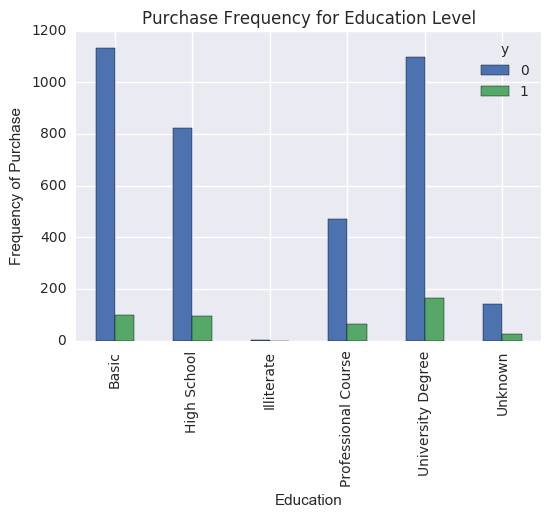

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.crosstab(bank.education,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Education Level')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')

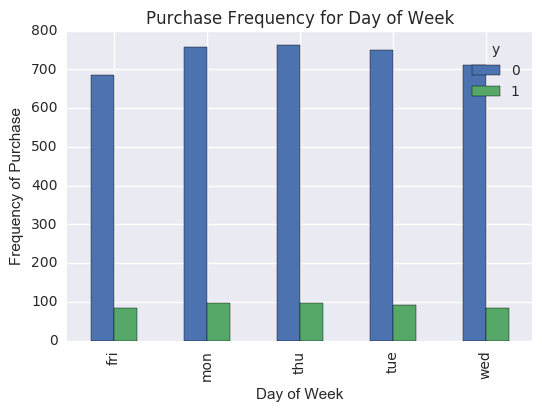

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(bank.day_of_week,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

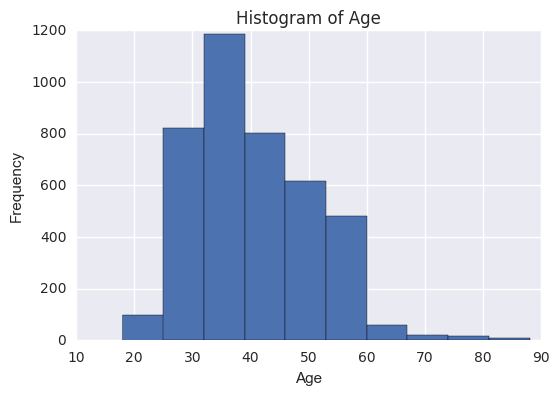

In [20]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [41]:
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'job_admin.',
       u'job_blue-collar', u'job_entrepreneur', u'job_housemaid',
       u'job_management', u'job_retired', u'job_self-employed',
       u'job_services', u'job_student', u'job_technician', u'job_unemployed',
       u'job_unknown', u'marital_divorced', u'marital_married',
       u'marital_single', u'marital_unknown', u'education_Basic',
       u'education_High School', u'education_Illiterate',
       u'education_Professional Course', u'education_University Degree',
       u'education_Unknown', u'default_no', u'default_unknown', u'default_yes',
       u'housing_no', u'housing_unknown', u'housing_yes', u'loan_no',
       u'loan_unknown', u'loan_yes', u'contact_cellular', u'contact_telep

In [21]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
   cat_list='var'+'_'+var
   cat_list = pd.get_dummies(bank[var], prefix=var)
   bank1=bank.join(cat_list)
   bank=bank1

In [22]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
bank_vars=bank.columns.values.tolist()
to_keep=[i for i in bank_vars if i not in cat_vars]


In [23]:
bank_final=bank[to_keep]
bank_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [46]:
bank_final_vars=bank_final.columns.values.tolist()
Y = ['y']
X = [i for i in bank_final_vars if i not in Y ]

In [47]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 12)
rfe = rfe.fit(bank_final[X],bank_final[Y].values )
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]
[35 41 18 45  1 14 27 25  1 40 22  3  1 37  2 42  1  5 30 33 12 47 19 44 31
 50 26 13 48 21 32  8 36 34 49 20  6 10 15  9 23 16  4 39 24  1  1  1  1  1
 17  1 46 38 28 43 29 11  1  7  1]


In [48]:
cols = bank_final[X].columns.values[rfe.support_].tolist()
cols

['previous',
 'euribor3m',
 'job_entrepreneur',
 'job_self-employed',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'poutcome_failure',
 'poutcome_success']

In [49]:
X = bank_final[cols]
Y = bank_final['y']

In [50]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.279180
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Thu, 12 Jan 2017   Pseudo R-squ.:                  0.1918
Time:                        12:01:34   Log-Likelihood:                -1149.9
converged:                       True   LL-Null:                       -1422.9
                                        LLR p-value:                4.975e-110
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
previous              0.3493      0.141      2.475      0.013         0.073     0.626
euribor3

In [51]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
clf.score(X,Y)

0.90216071862102454

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [54]:
from sklearn import linear_model
from sklearn import metrics
clf1 = linear_model.LogisticRegression()
clf1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
probs = clf1.predict_proba(X_test)

In [56]:
probs[:5]

array([[ 0.93352157,  0.06647843],
       [ 0.88259365,  0.11740635],
       [ 0.93040666,  0.06959334],
       [ 0.93733407,  0.06266593],
       [ 0.93491373,  0.06508627]])

In [57]:
predicted = clf1.predict(X_test)
predicted[:5]

array([0, 0, 0, 0, 0])

In [58]:
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
prob_df['predict']=np.where(prob_df[0]>=0.10,1,0)
prob_df.head()

,0,predict
0,0.066478,0
1,0.117406,1
2,0.069593,0
3,0.062666,0
4,0.065086,0


In [59]:
prob_df.predict.mean()

0.27750809061488674

In [60]:
prob_df['predict']=np.where(prob_df[0]>=0.15,1,0)
prob_df.predict.mean()

0.1755663430420712

In [61]:
print metrics.accuracy_score(y_true=Y_test, y_pred=predicted)

0.902103559871


In [62]:
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
prob_df['predict']=np.where(prob_df[0]>=0.05,1,0)
prob_df
prob_df['actual']=Y_test.values
prob_df.head()

,0,predict,actual
0,0.066478,1,0
1,0.117406,1,0
2,0.069593,1,0
3,0.062666,1,0
4,0.065086,1,0


In [63]:
confusion_matrix=pd.crosstab(prob_df['actual'],prob_df['predict'])
confusion_matrix

predict,0,1
actual,,
0,413,701
1,15,107


In [64]:
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
prob_df['predict']=np.where(prob_df[0]>=0.10,1,0)
prob_df
prob_df['actual']=Y_test.values
confusion_matrix=pd.crosstab(prob_df['actual'],prob_df['predict'])
confusion_matrix

predict,0,1
actual,,
0,847,267
1,46,76


<img src="rocbase.png" width=620>

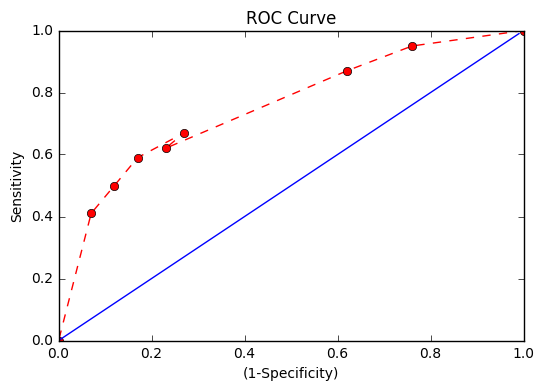

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
Sensitivity=[1,0.95,0.87,0.62,0.67,0.59,0.5,0.41,0]
FPR=[1,0.76,0.62,0.23,0.27,0.17,0.12,0.07,0]
plt.plot(FPR,Sensitivity,marker='o',linestyle='--',color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')